# HNGARCH PREPROCESSING

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Opening Files

In [ ]:
filename = "Risk_Premium_Analysis_DB.xlsx"
db = pd.read_excel(filename)

# Rename Columns
rename_dict = {
    'MSCI Global Environment': 'Environment',
    'MSCI Global Alternative Energy': 'Alternative_energy',
    'MSCI Global Energy Efficiency': 'Energy_efficiency',
    'MSCI Global Green Building': 'Green_building',
    'MSCI Global Pollution Prevention': 'Pollution_prevention',
    'MSCI Global Sustainable Water': 'Sustainable_water',
    'MSCI ACWI Net Total Return': 'MSCI ACWI'
}
db.rename(columns=rename_dict, inplace=True)


In [4]:
## Column Date to DateTime
db['Date'] = pd.to_datetime(db['Date'])
db.set_index('Date', inplace=True)
db.index = pd.DatetimeIndex(db.index, freq='B')

In [6]:
# Not Available 
print(db.isnull().sum().sort_values(ascending=False))

Environment                                   0
Alternative_energy                            0
Energy_efficiency                             0
Green_building                                0
Pollution_prevention                          0
Sustainable_water                             0
MSCI ACWI                                     0
Global Corporate IG Option-adjusted Spread    0
Global Corporate HY Option-adjusted Spread    0
World Breakeven Inflation                     0
World Real Rate                               0
Dollar Index                                  0
Libor USD 1 Month                             0
dtype: int64


## Create a Dataframe of ESG series

In [7]:
## New Dataframe
esg_cols = ['Environment', 'Alternative_energy', 'Energy_efficiency',
            'Green_building', 'Pollution_prevention', 'Sustainable_water', 'MSCI ACWI']
df = db[esg_cols].copy()

## Plot ESG Series

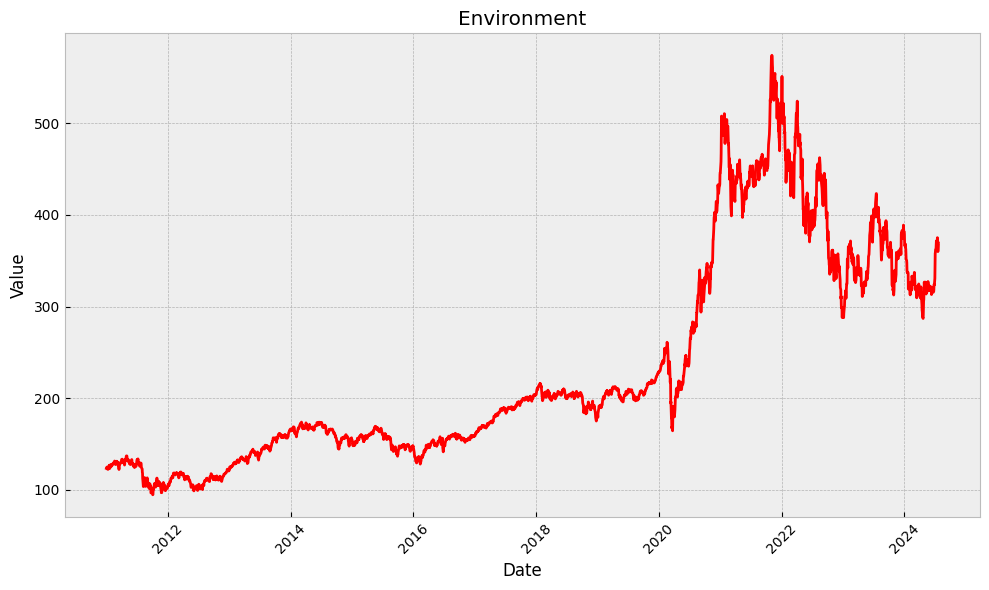

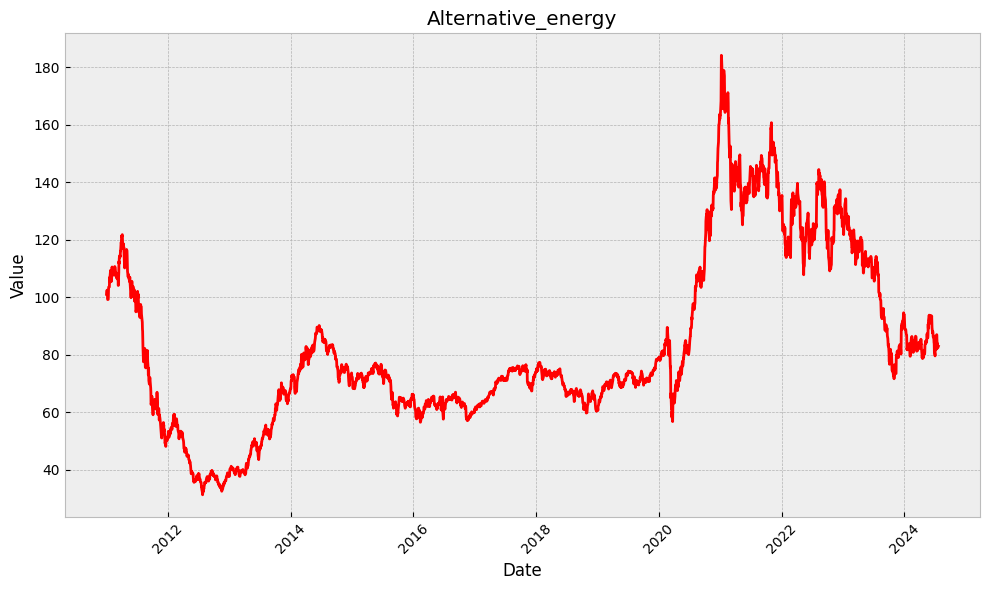

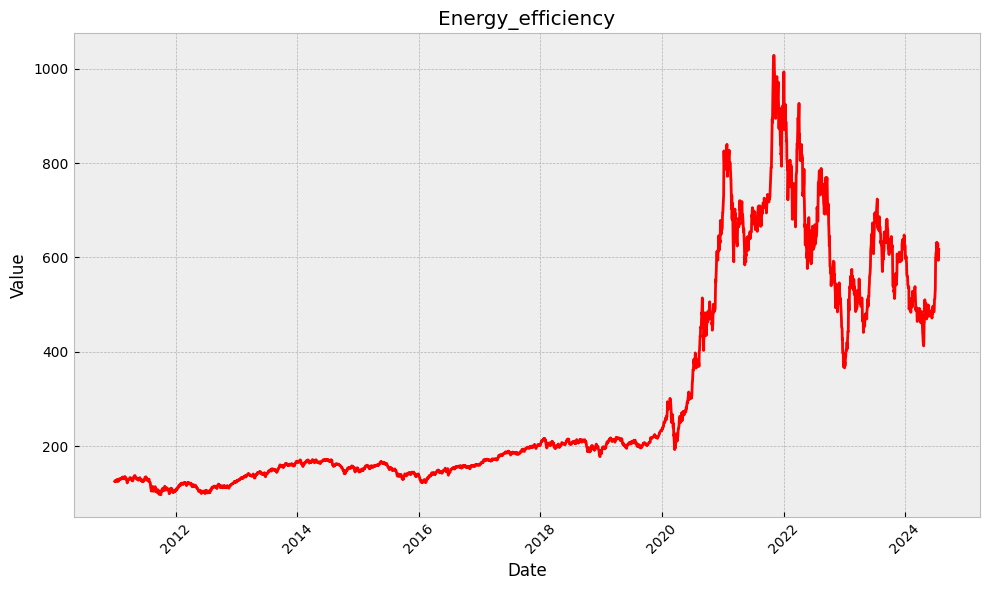

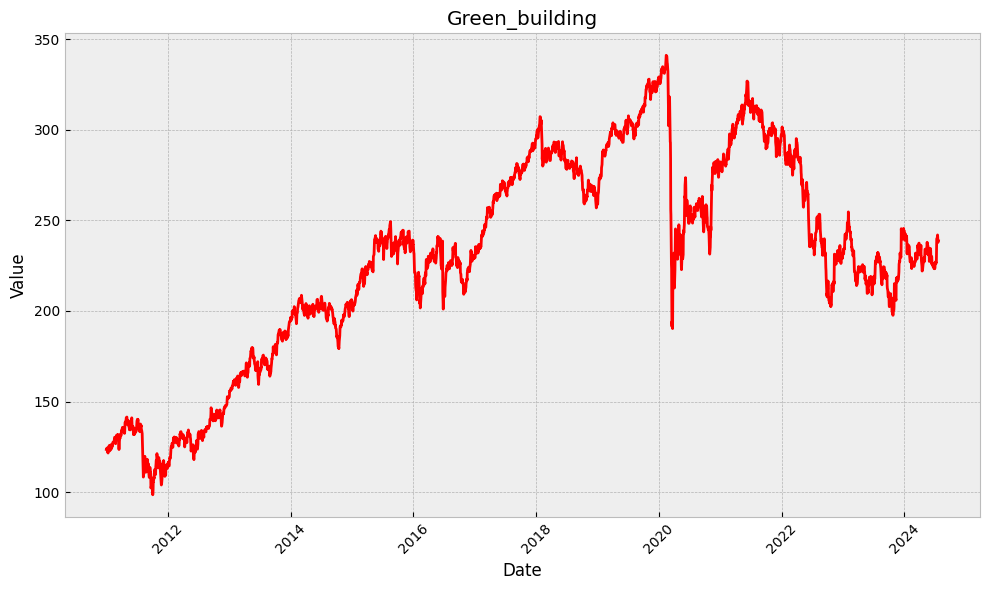

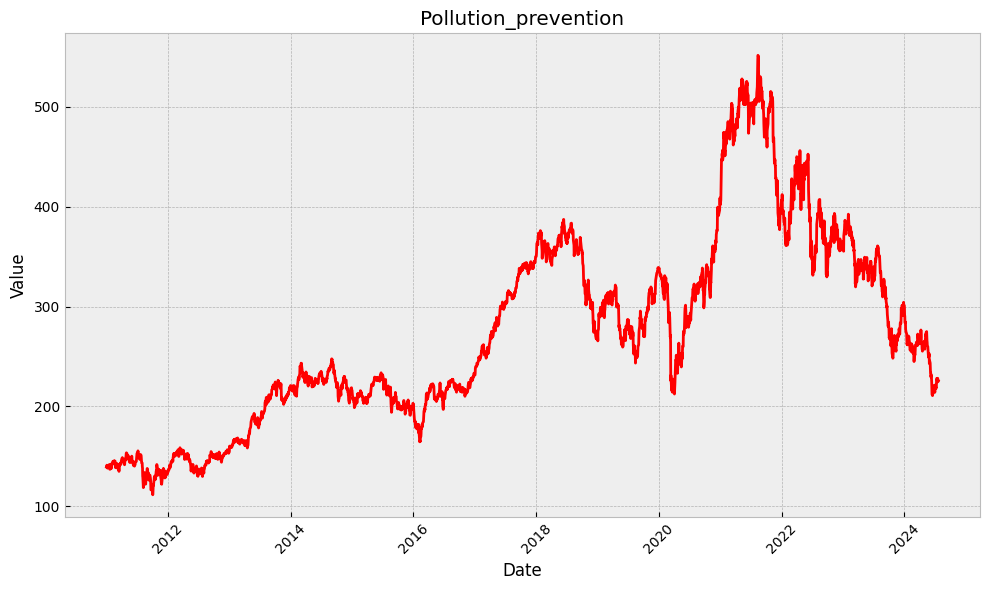

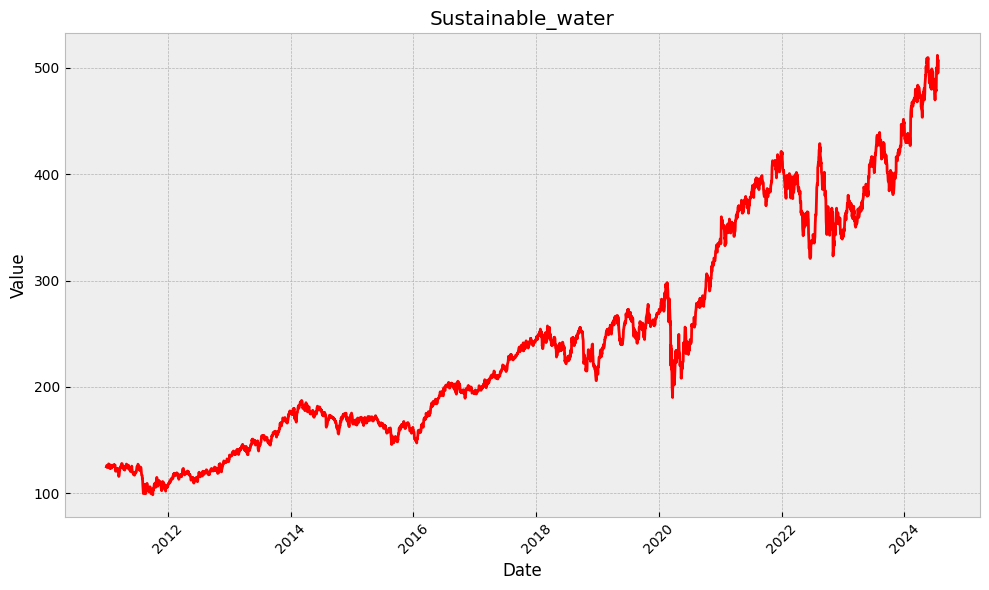

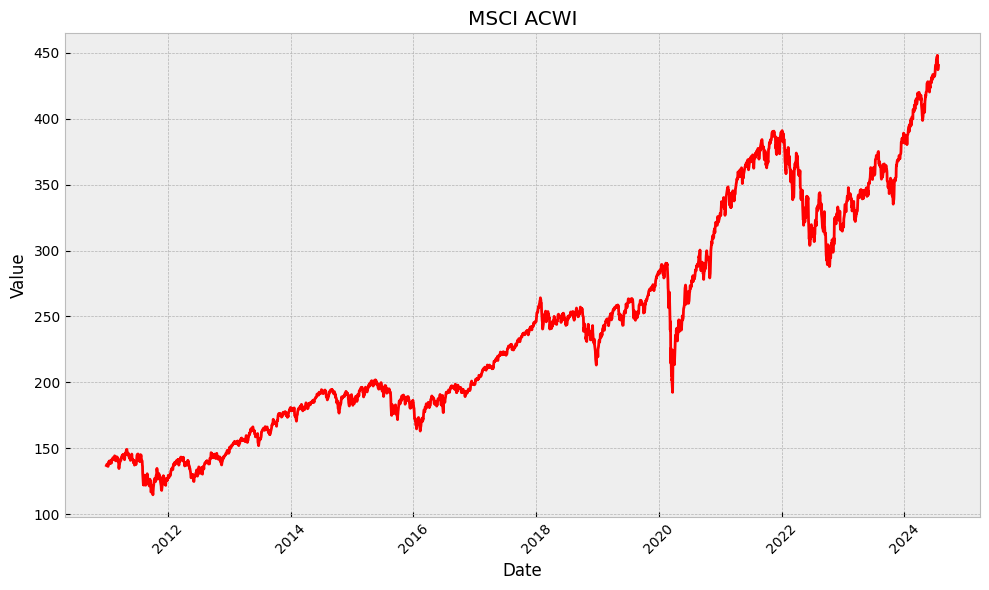

In [8]:
column_names = df.columns[:]

for col in column_names:
    # Creating Plot
    plt.figure(figsize=(10, 6))
    plt.style.use('bmh')

    plt.plot(db.index, db[col], label= f'{col}', color='red')

    # Add Title and axis titles
    plt.title(f'{col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Showing plot
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## ADF Test
### Constant and Trend ADF Test

In [9]:
##TEST ADF
def adfuller_test(series, title=''):
    print(f'-- Dickey-Fuller Test: {title} --')
    result = adfuller(series, autolag='AIC')
    labels = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())

##TEST ADF
def adfuller_test_trend(series, title=''):
    print(f'-- Dickey-Fuller Test: {title} --')
    result = adfuller(series, autolag='AIC', regression = 'ct')
    labels = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())

In [10]:
column_names = df.columns[:]
for col in column_names:
    print(f'Stationarity Test for {col}')
    adfuller_test(df[col], 'Original Series')
    print(f"{'='*50}\n")

Stationarity Test for Environment
-- Dickey-Fuller Test: Original Series --
Test Statistic                   -1.064329
p-value                           0.729085
#Lags Used                       29.000000
Number of Observations Used    3507.000000
Critical Value (1%)              -3.432216
Critical Value (5%)              -2.862364
Critical Value (10%)             -2.567209

Stationarity Test for Alternative_energy
-- Dickey-Fuller Test: Original Series --
Test Statistic                   -1.647457
p-value                           0.458367
#Lags Used                        8.000000
Number of Observations Used    3528.000000
Critical Value (1%)              -3.432205
Critical Value (5%)              -2.862360
Critical Value (10%)             -2.567206

Stationarity Test for Energy_efficiency
-- Dickey-Fuller Test: Original Series --
Test Statistic                   -1.078772
p-value                           0.723463
#Lags Used                       29.000000
Number of Observations Use

### Trend ADF Test for MSCI ACWI 

In [11]:
print(f'Stationarity Test for MSCI ACWI')
adfuller_test_trend(db['MSCI ACWI'], 'Original Serie')
print(f"{'='*50}\n")

print(f'Stationarity Test for Sustainable Water')
adfuller_test_trend(db['Sustainable_water'], 'Original Serie')

Stationarity Test for MSCI ACWI
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -2.547979
p-value                           0.304404
#Lags Used                       14.000000
Number of Observations Used    3522.000000
Critical Value (1%)              -3.961343
Critical Value (5%)              -3.411737
Critical Value (10%)             -3.127784

Stationarity Test for Sustainable Water
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -2.152326
p-value                           0.516700
#Lags Used                       23.000000
Number of Observations Used    3513.000000
Critical Value (1%)              -3.961349
Critical Value (5%)              -3.411740
Critical Value (10%)             -3.127786


## Differentiation of the ESG Series

In [12]:
df_diff = df.diff().add_suffix('_diff')
df_diff = df_diff.drop(df_diff.index[0])

## ADF Test for Differenced Series

In [13]:
for col in df_diff:
    print(f'Stationarity Test for {col}')
    adfuller_test(df_diff[col], 'Differenced Series')
    print(f"{'='*50}\n")

Stationarity Test for Environment_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                -1.152330e+01
p-value                        3.991622e-21
#Lags Used                     2.800000e+01
Number of Observations Used    3.507000e+03
Critical Value (1%)           -3.432216e+00
Critical Value (5%)           -2.862364e+00
Critical Value (10%)          -2.567209e+00

Stationarity Test for Alternative_energy_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                  -20.065985
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    3528.000000
Critical Value (1%)              -3.432205
Critical Value (5%)              -2.862360
Critical Value (10%)             -2.567206

Stationarity Test for Energy_efficiency_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                -1.151595e+01
p-value                        4.149927e-21
#Lags Used                     2.800

# Frequency Distributions, Skewness, Kustosis and Shapiro test for Normality

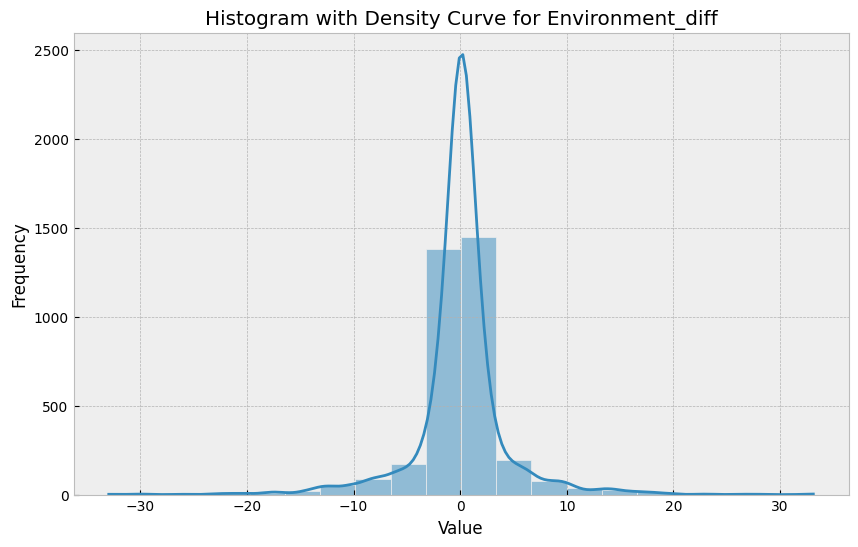

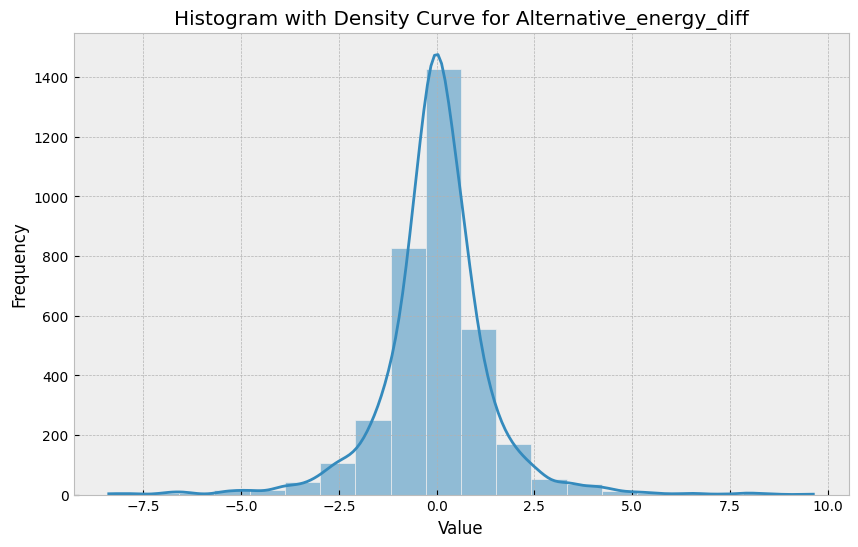

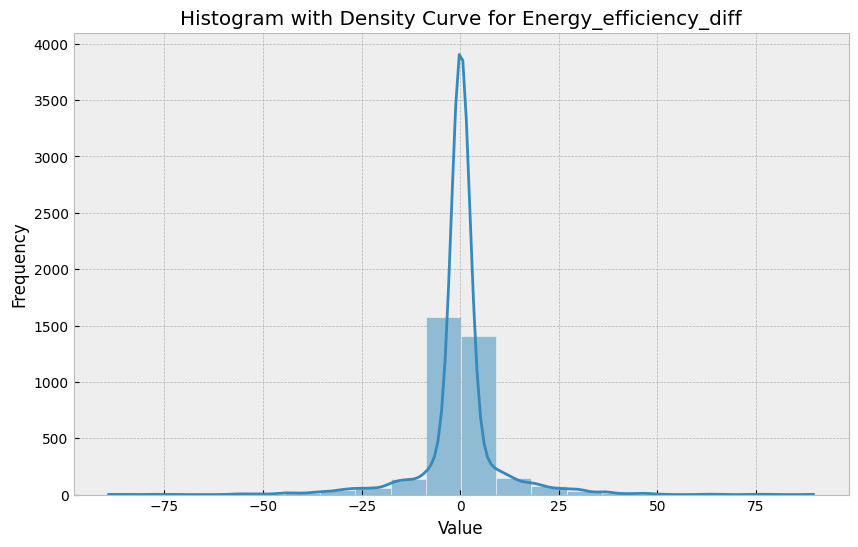

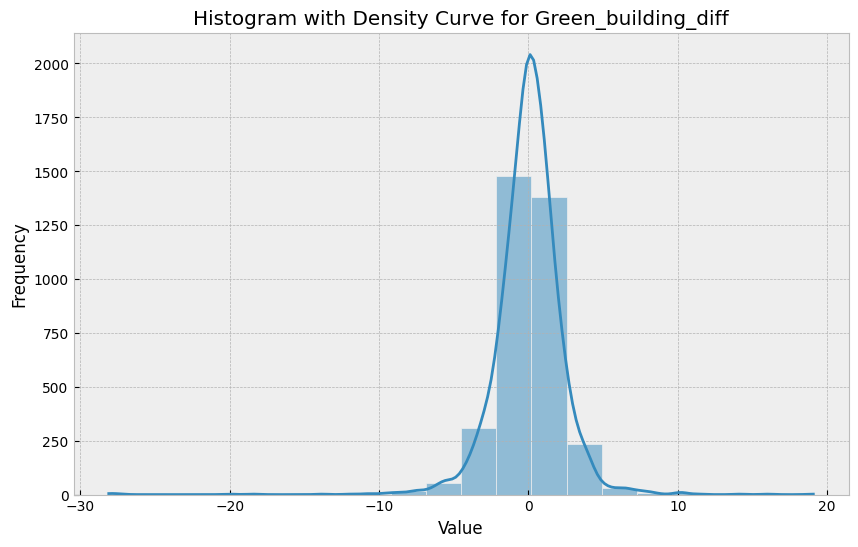

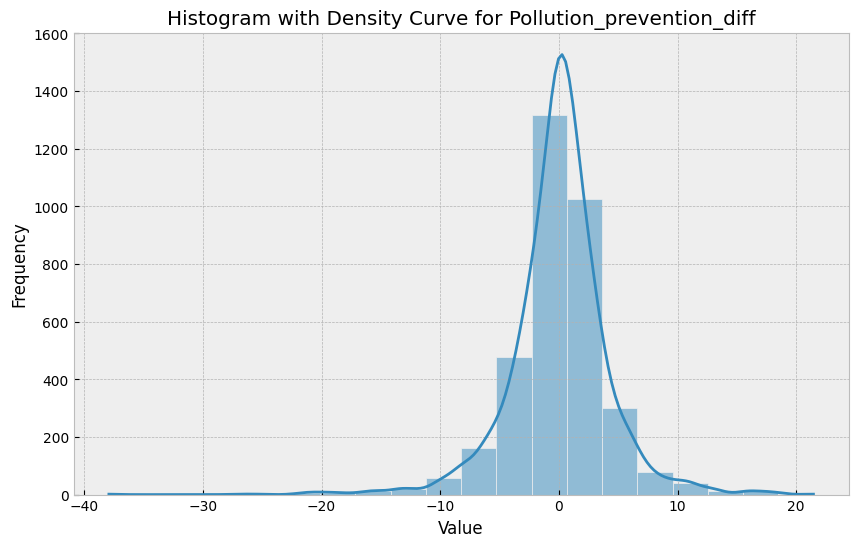

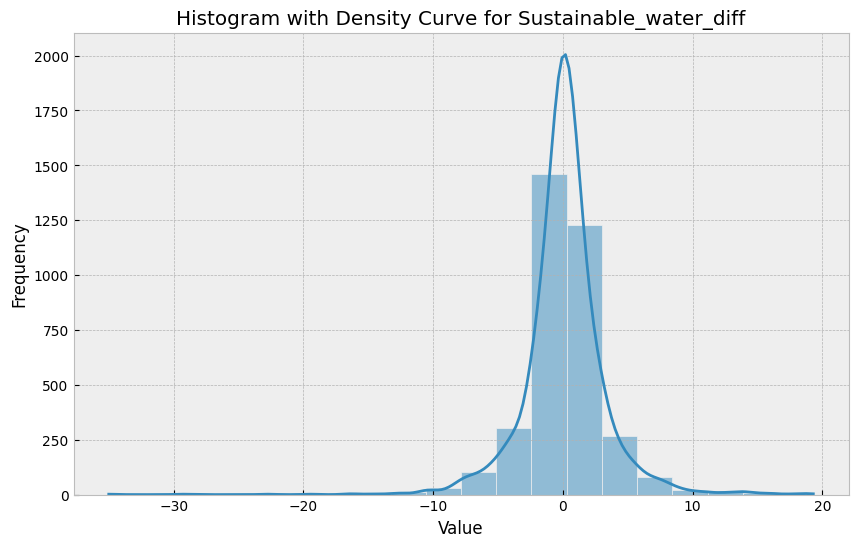

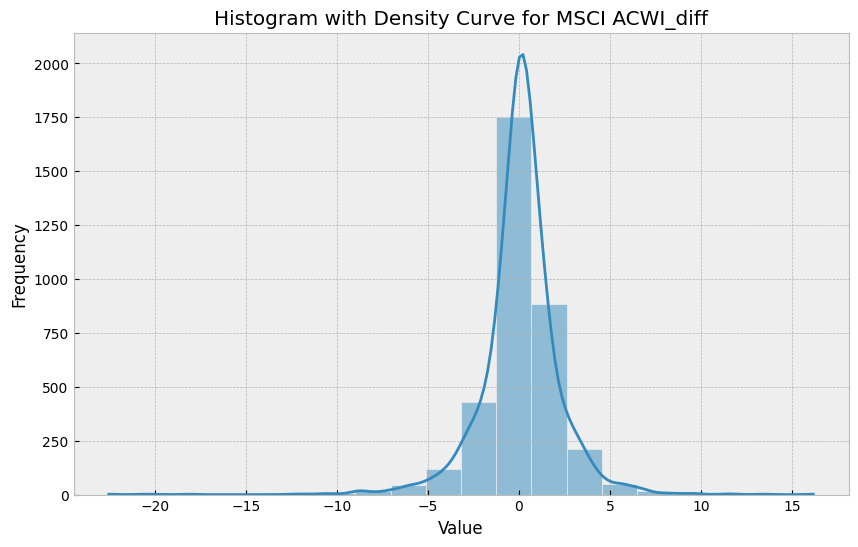

In [14]:
for col in df_diff:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_diff[col], bins=20, kde=True)
    plt.title(f'Histogram with Density Curve for {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
for col in df_diff:
    shapiro_stat, shapiro_p_value = shapiro(df_diff[col])
    print(f"Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

Shapiro-Wilk Test: Statistic=0.8063649413994637, p-value=4.02692653396483e-54
Shapiro-Wilk Test: Statistic=0.9040613952089854, p-value=1.4512479683258857e-42
Shapiro-Wilk Test: Statistic=0.7062340994312701, p-value=1.1661022049060773e-61
Shapiro-Wilk Test: Statistic=0.8615549158715374, p-value=2.0192789007551523e-48
Shapiro-Wilk Test: Statistic=0.9226925727869992, p-value=2.6701987680505903e-39
Shapiro-Wilk Test: Statistic=0.8883593353792096, p-value=6.148968561159053e-45
Shapiro-Wilk Test: Statistic=0.89571835356485, p-value=7.321318146715518e-44


In [16]:
for col in df_diff:
    # Skewness
    skewness = skew(df_diff[col])

    # Kurtosis
    kurt = kurtosis(df_diff[col])

    print(f"Skewness per {col}: {skewness}")
    print(f"Kurtosis per {col}: {kurt}")
    print(f"{'='*50}\n")

Skewness per Environment_diff: -0.14031183873891148
Kurtosis per Environment_diff: 10.362721643928483

Skewness per Alternative_energy_diff: -0.020173991452771878
Kurtosis per Alternative_energy_diff: 6.826282993489686

Skewness per Energy_efficiency_diff: -0.1422369999060945
Kurtosis per Energy_efficiency_diff: 14.963813481272641

Skewness per Green_building_diff: -1.6130776052516582
Kurtosis per Green_building_diff: 23.90492056278209

Skewness per Pollution_prevention_diff: -0.5940365385153241
Kurtosis per Pollution_prevention_diff: 6.3286378966842936

Skewness per Sustainable_water_diff: -0.4364113158445208
Kurtosis per Sustainable_water_diff: 11.537385353378212

Skewness per MSCI ACWI_diff: -0.8402898401904756
Kurtosis per MSCI ACWI_diff: 11.125723902130124



# Autocorrelation Plot

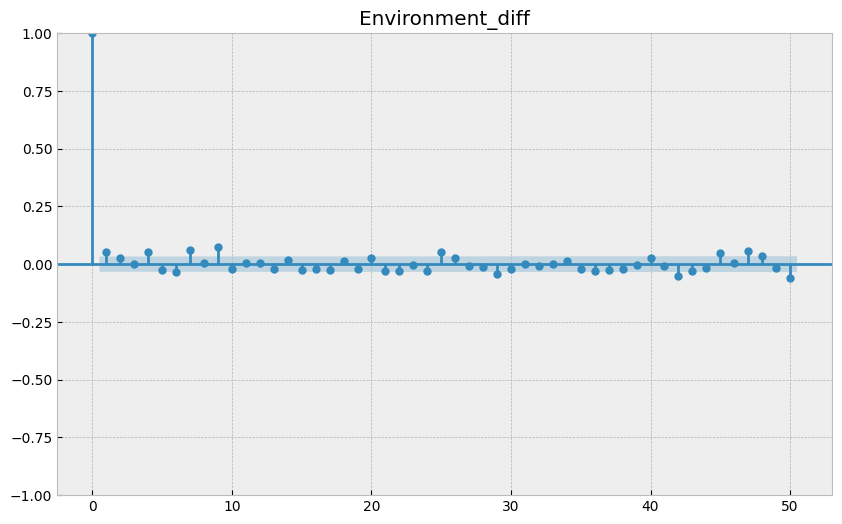

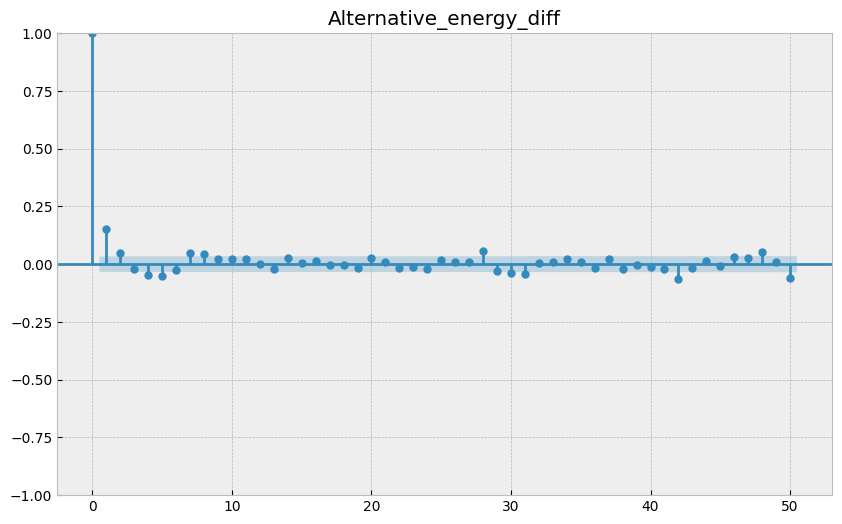

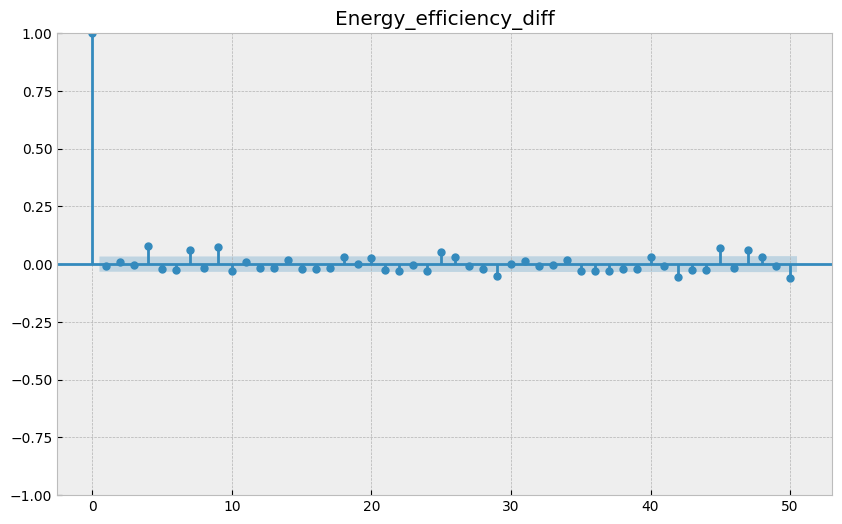

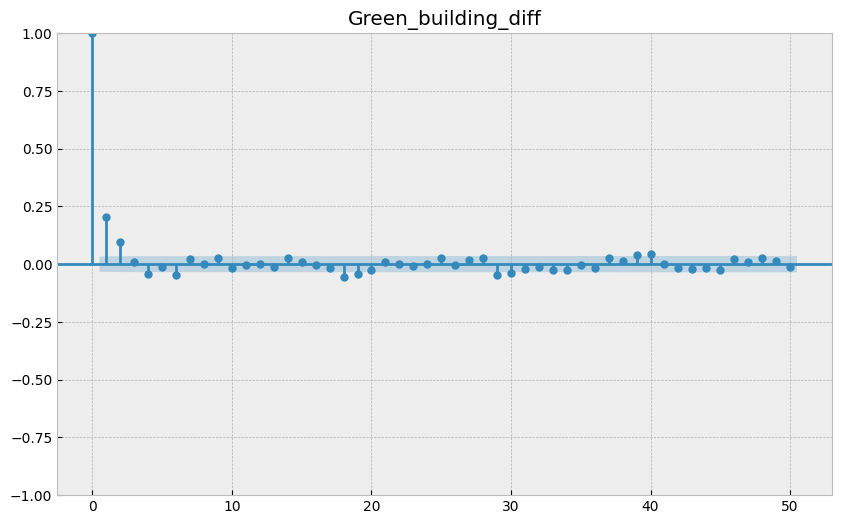

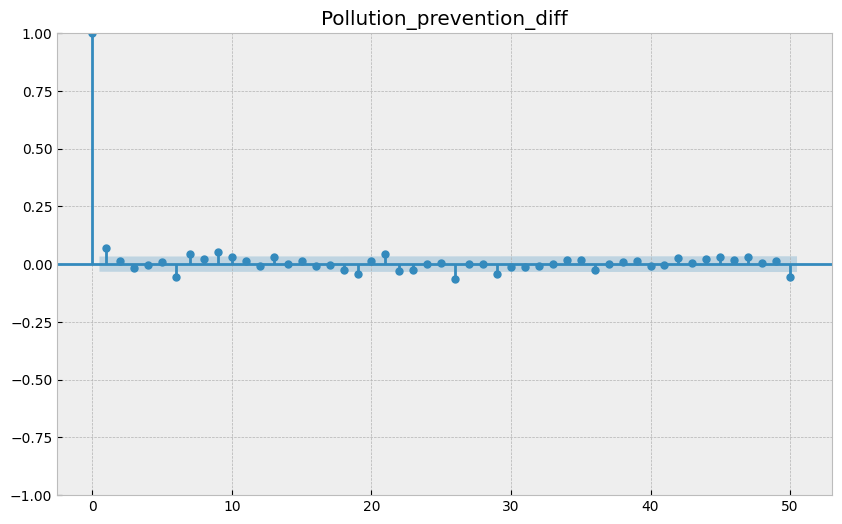

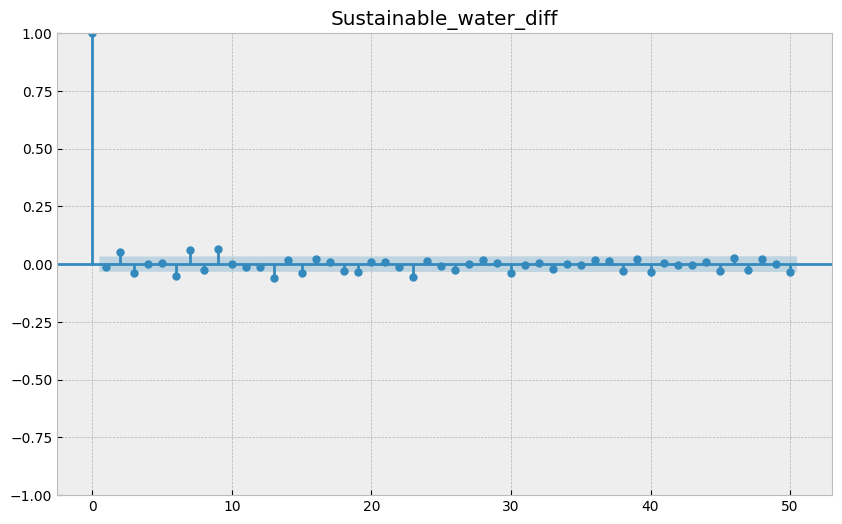

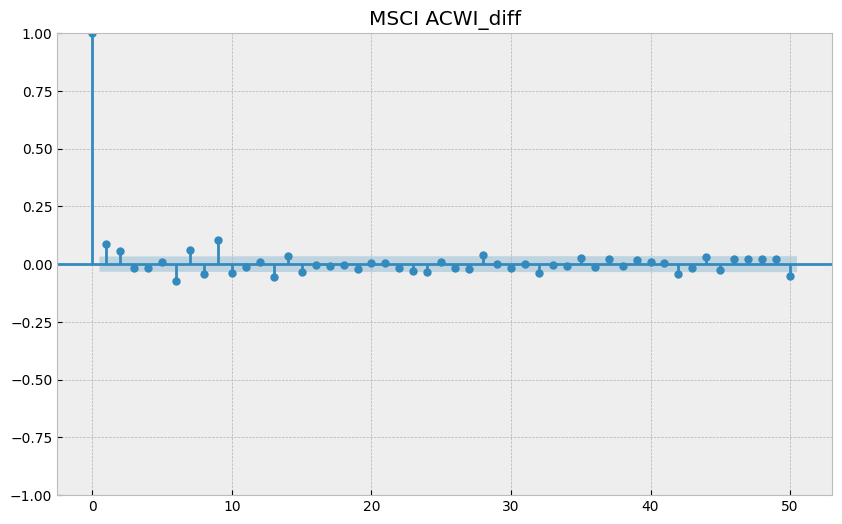

In [17]:
for col in df_diff:
    fig, ax = plt.subplots(figsize=(10, 6))
    tsaplots.plot_acf(df_diff[col], lags=50, ax=ax)
    plt.title(f'{col}')
    plt.show()

## Using Squared Returns to Analyse Clusters in Financial Market Volatility

In [18]:
for col in df_diff:
    df_diff[f'{col}_sqr'] = df_diff[col] ** 2

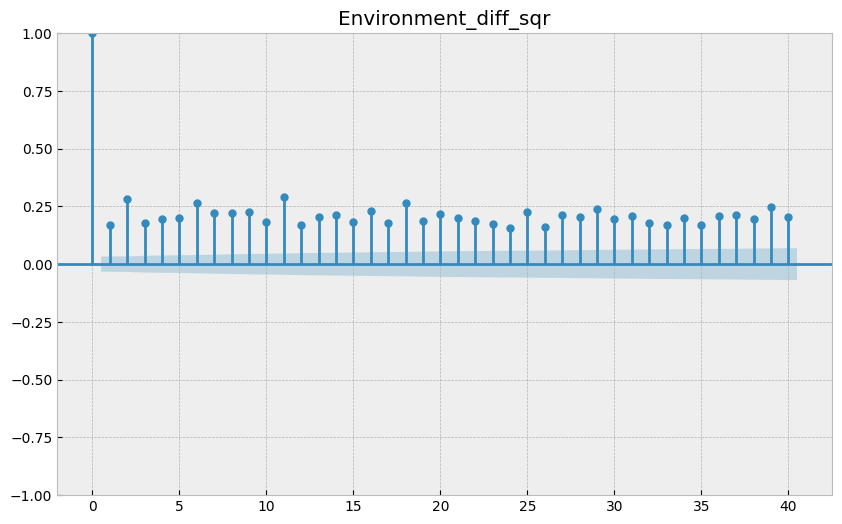

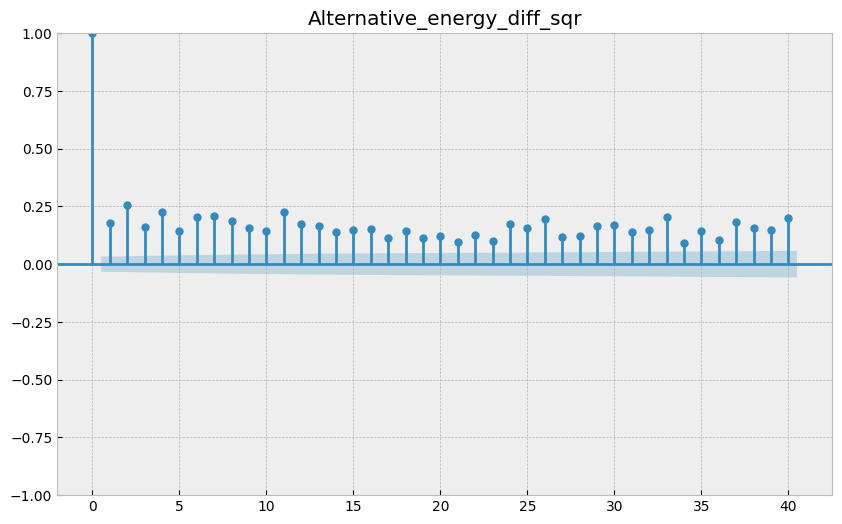

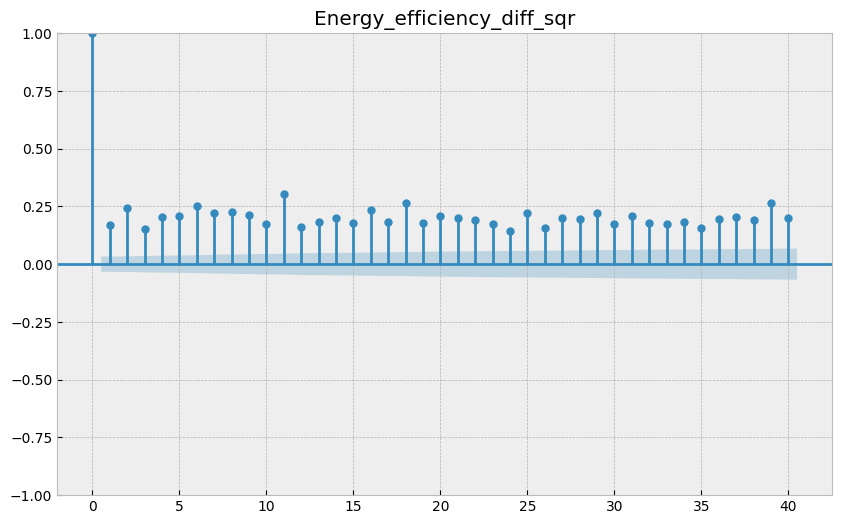

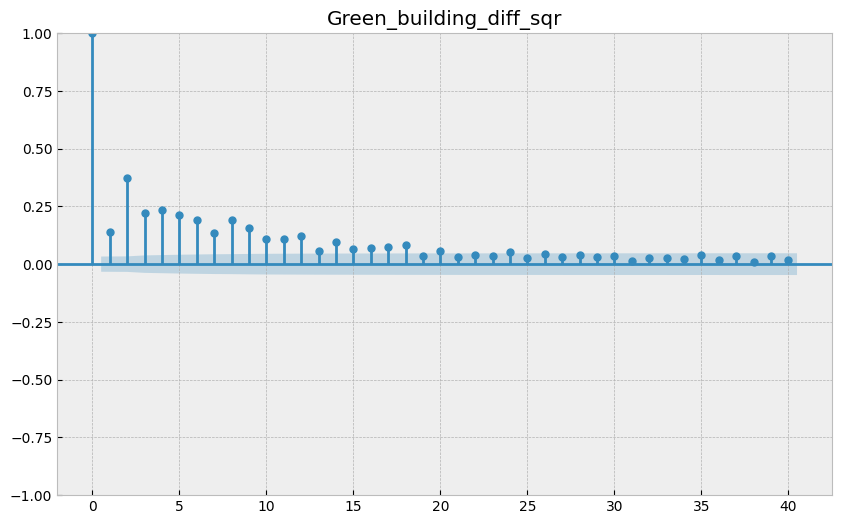

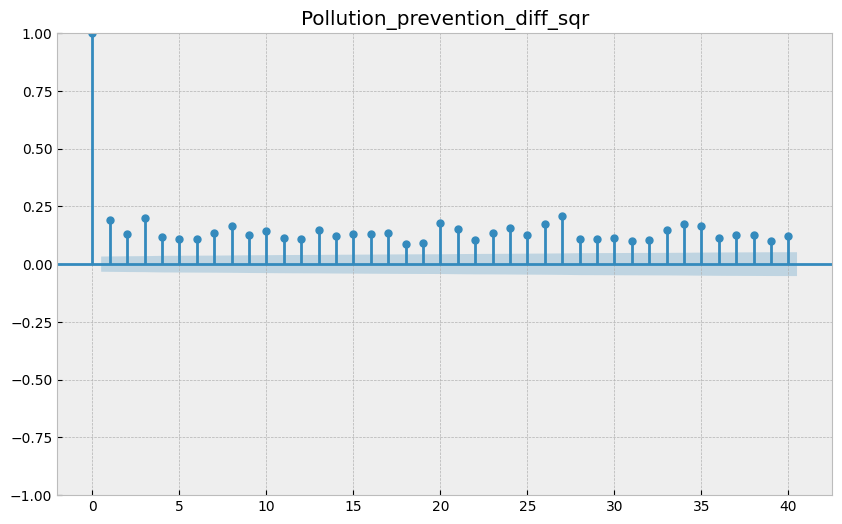

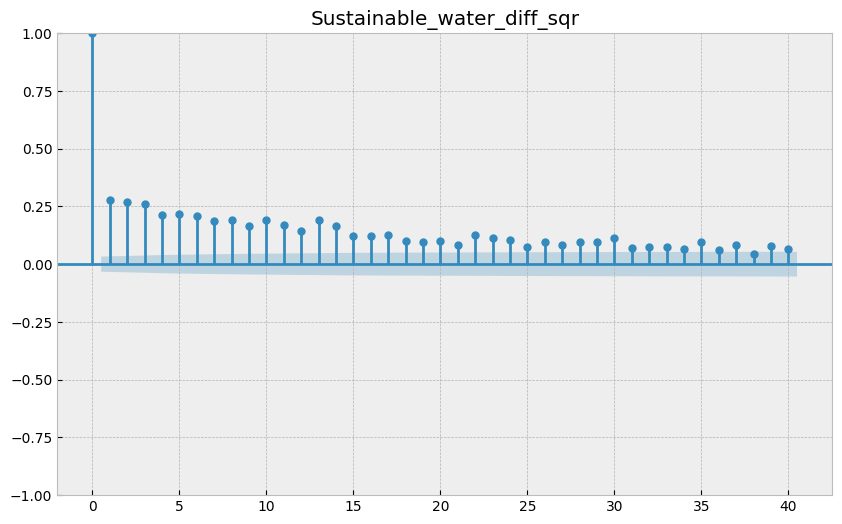

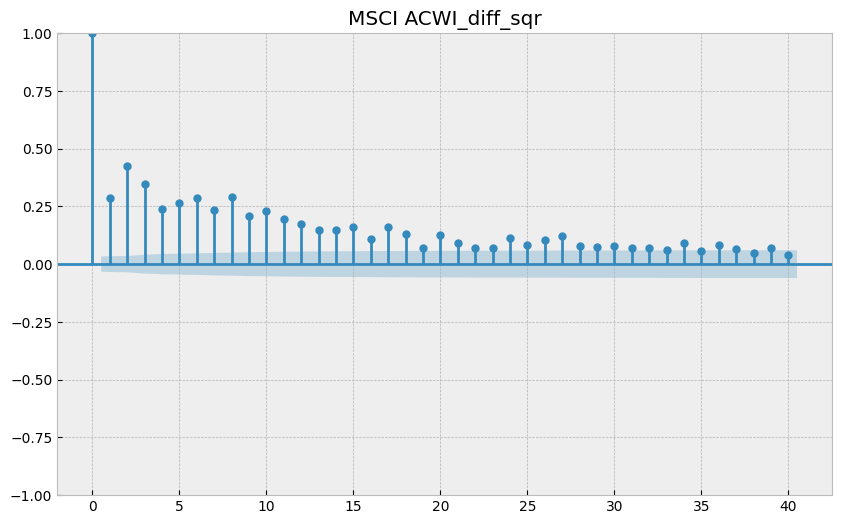

In [19]:
column_names = df_diff.columns[7:]

for col in column_names:
    fig, ax = plt.subplots(figsize=(10, 6))
    tsaplots.plot_acf(df_diff[col], lags=40, ax=ax)
    plt.title(f'{col}')
    plt.show()

# Risk Free Serie

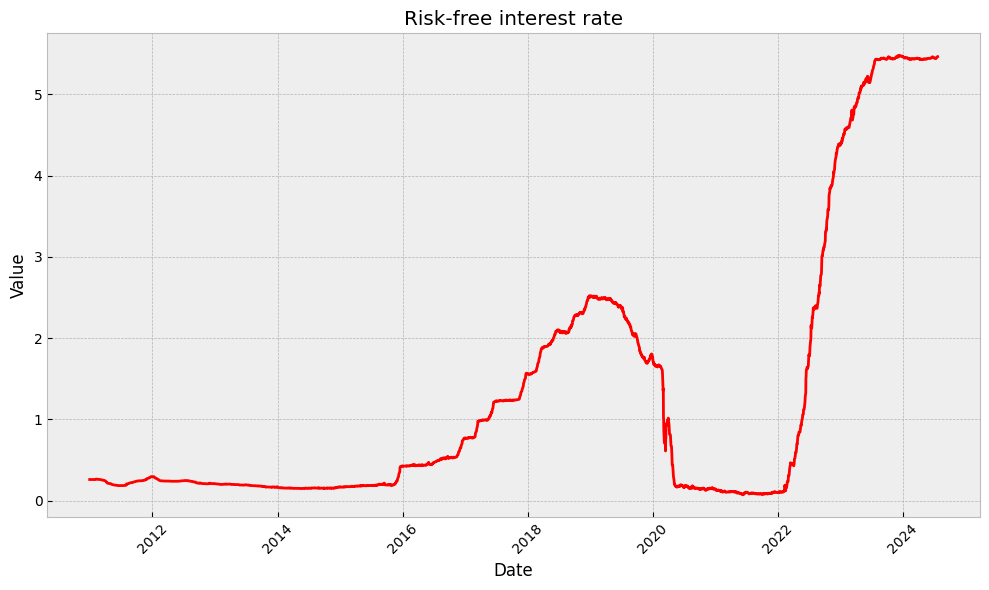

In [20]:
risk_free = db['Libor USD 1 Month']

plt.figure(figsize=(10, 6))
plt.style.use('bmh')

plt.plot(db.index, risk_free, label= risk_free, color='red')

## Add Title and Axis Titles
plt.title('Risk-free interest rate')
plt.xlabel('Date')
plt.ylabel('Value')

# Showing plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Factor Preprocessing

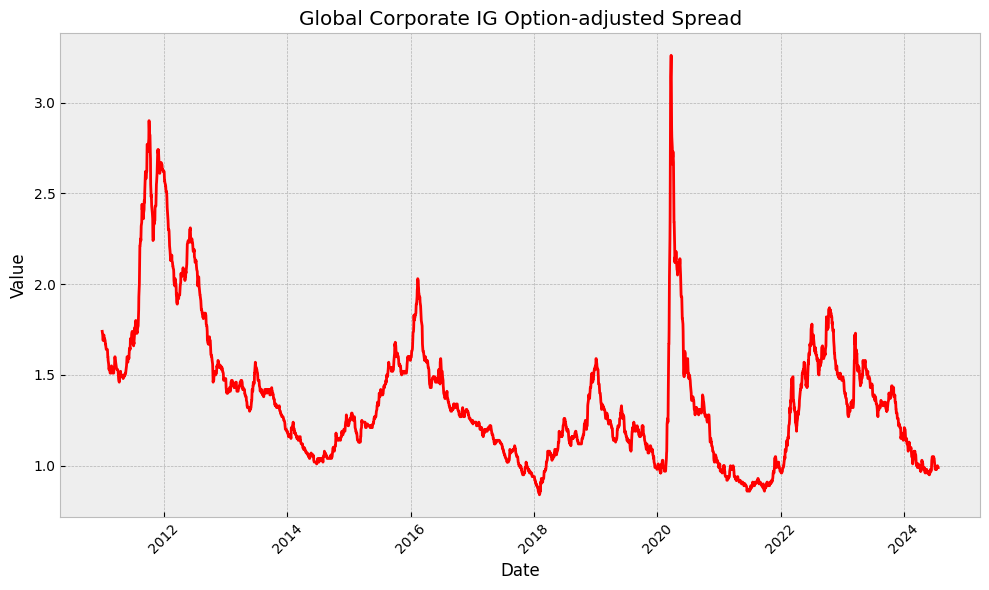

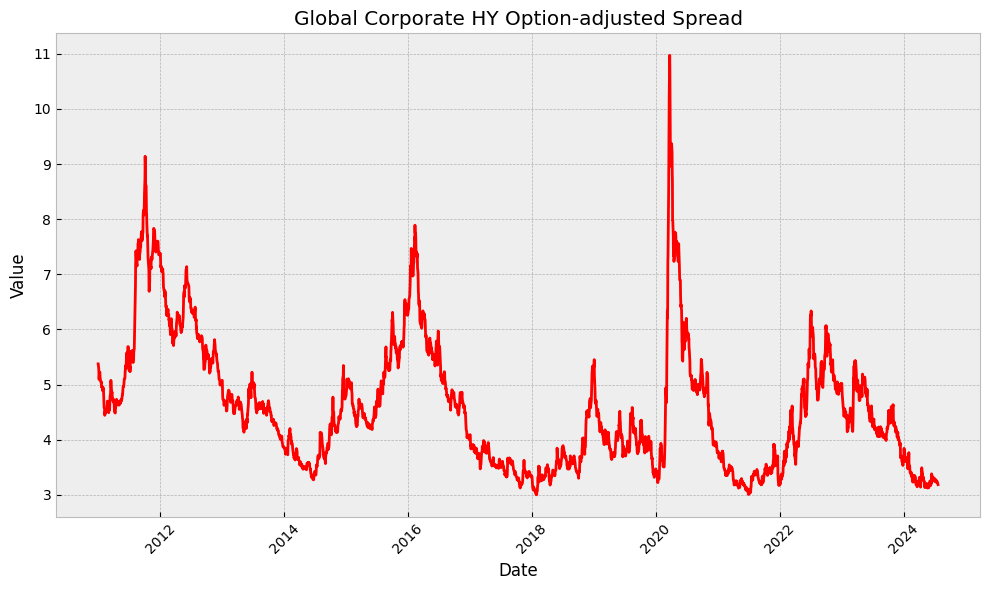

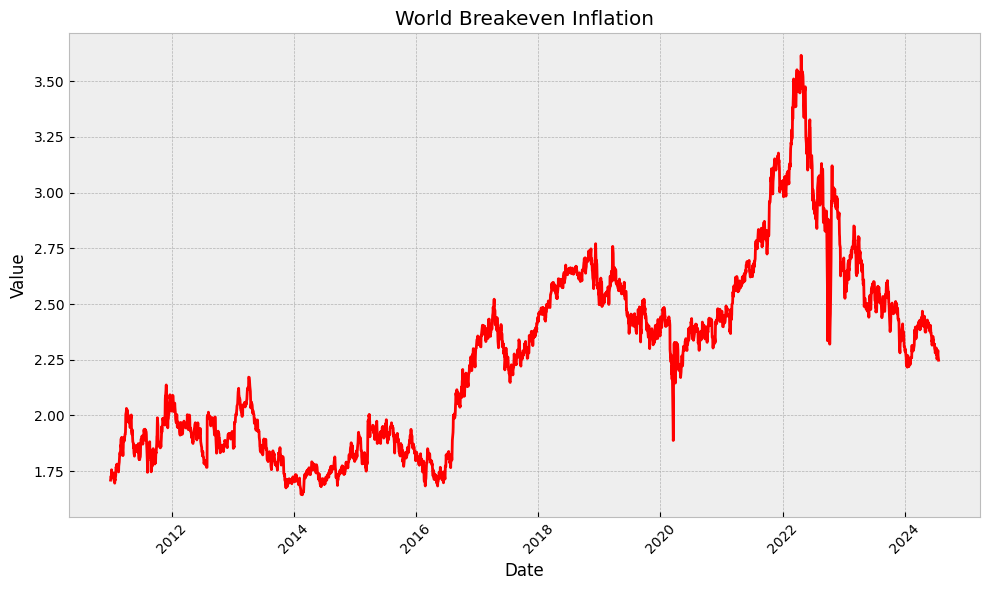

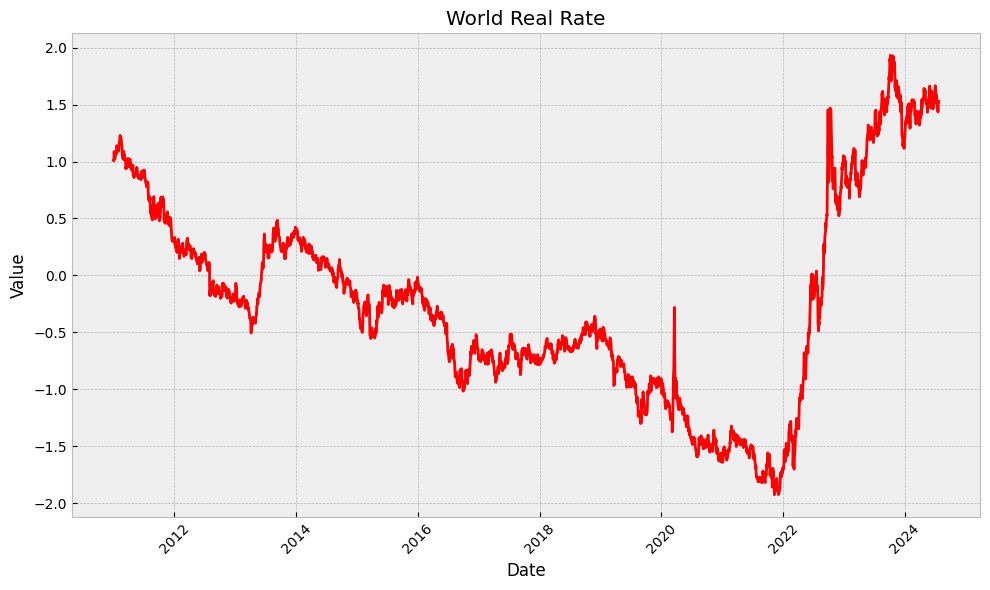

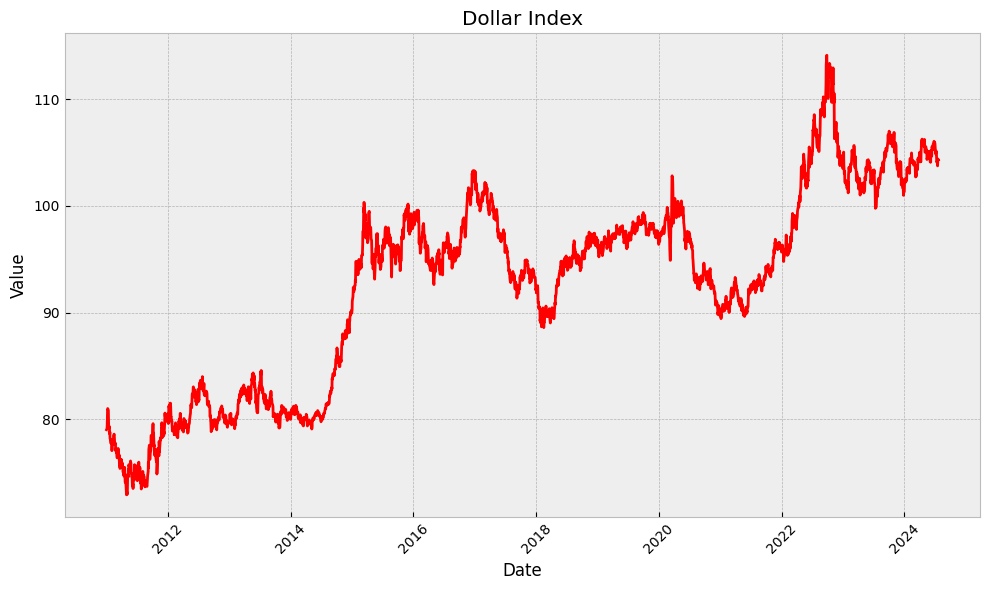

In [21]:
# Itera attraverso le colonne e crea un dataset per ciascuna serie temporale
column_names = db.columns[7:12]

for col in column_names:
    plt.figure(figsize=(10, 6))

    plt.plot(db.index, db[col], label= f'{col}', color='red')

    plt.title(f'{col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Testing Stationarity of the Factors

In [22]:
## Trend ADF Stationarity Test
print(f'Stationarity Test for {col}')
adfuller_test_trend(db['Dollar Index'], 'Original Serie')

Stationarity Test for Dollar Index
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -2.456625
p-value                           0.349976
#Lags Used                        0.000000
Number of Observations Used    3536.000000
Critical Value (1%)              -3.961333
Critical Value (5%)              -3.411732
Critical Value (10%)             -3.127782


In [23]:
column_names = db.columns[7:12]

for col in column_names:
    print(f'Stationarity Test for {col}')
    adfuller_test(db[col], 'Original Serie')
    print(f"{'='*50}\n")

Stationarity Test for Global Corporate IG Option-adjusted Spread
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -2.917627
p-value                           0.043336
#Lags Used                       25.000000
Number of Observations Used    3511.000000
Critical Value (1%)              -3.432214
Critical Value (5%)              -2.862364
Critical Value (10%)             -2.567208

Stationarity Test for Global Corporate HY Option-adjusted Spread
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -3.002670
p-value                           0.034646
#Lags Used                       25.000000
Number of Observations Used    3511.000000
Critical Value (1%)              -3.432214
Critical Value (5%)              -2.862364
Critical Value (10%)             -2.567208

Stationarity Test for World Breakeven Inflation
-- Dickey-Fuller Test: Original Serie --
Test Statistic                   -1.807613
p-value                           0.376689
#Lags Use

# Differentiation and Visualizzation

In [24]:
column_names = db.columns[7:12]

for col in column_names:
    db[f'{col}_diff'] = db[col].diff()

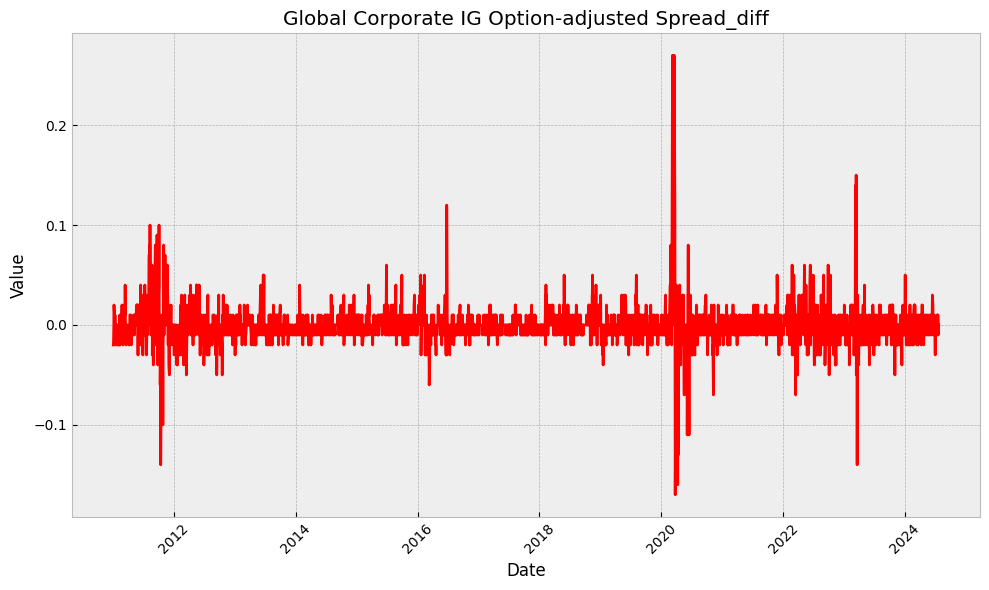

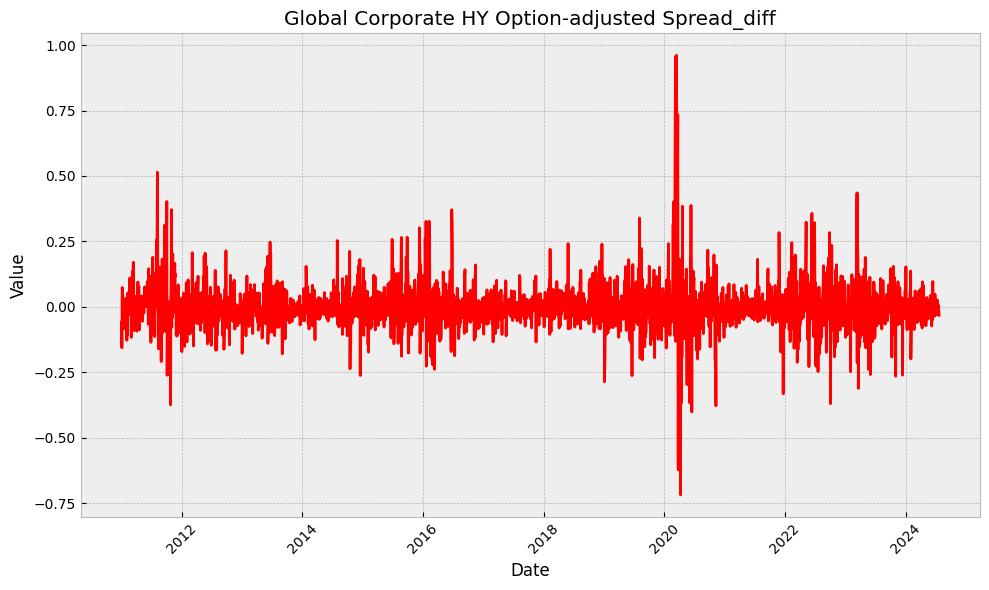

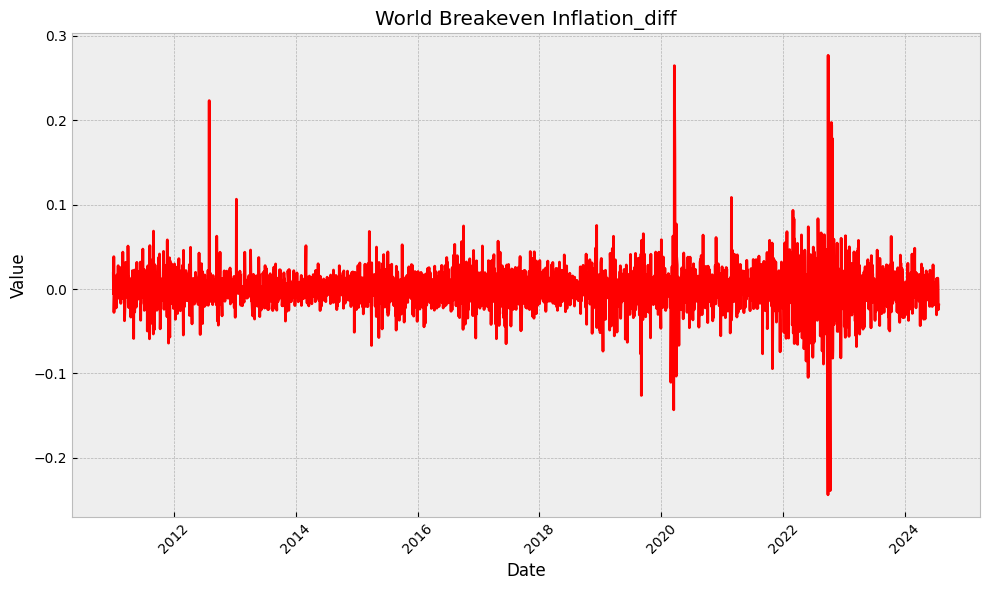

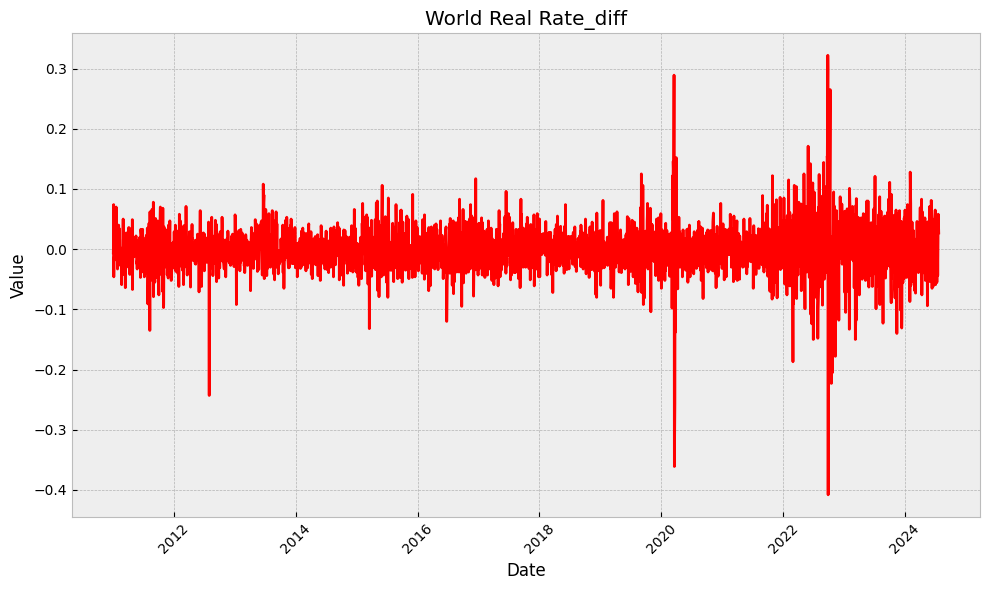

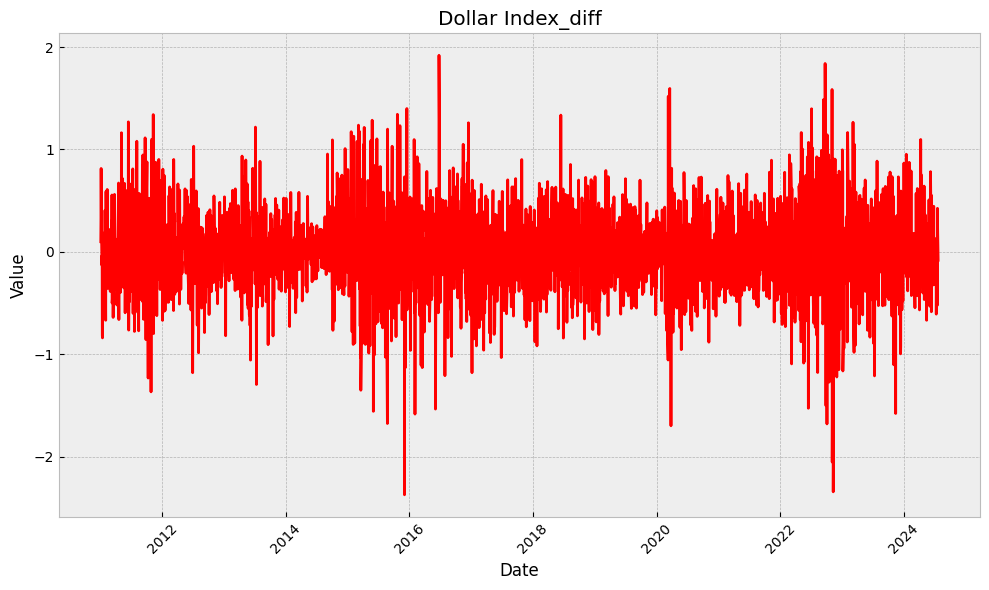

In [25]:
column_names = db.columns[13:]

for col in column_names:
    plt.figure(figsize=(10, 6))

    plt.plot(db.index, db[col], label= f'{col}', color='red')

    plt.title(f'{col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [26]:
db = db.drop(db.index[0])

## Testing Stationarity for Differenced Factors

In [27]:
column_names = db.columns[13:]

for col in column_names:
    print(f'Stationarity Test for {col}')
    adfuller_test(db[col], 'Differenced Series')
    print(f"{'='*50}\n")

Stationarity Test for Global Corporate IG Option-adjusted Spread_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                -1.213707e+01
p-value                        1.683940e-22
#Lags Used                     2.400000e+01
Number of Observations Used    3.511000e+03
Critical Value (1%)           -3.432214e+00
Critical Value (5%)           -2.862364e+00
Critical Value (10%)          -2.567208e+00

Stationarity Test for Global Corporate HY Option-adjusted Spread_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                -1.272780e+01
p-value                        9.518284e-24
#Lags Used                     2.400000e+01
Number of Observations Used    3.511000e+03
Critical Value (1%)           -3.432214e+00
Critical Value (5%)           -2.862364e+00
Critical Value (10%)          -2.567208e+00

Stationarity Test for World Breakeven Inflation_diff
-- Dickey-Fuller Test: Differenced Series --
Test Statistic                  -21.097571
p-value    